In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv(r'/Users/prasad/Downloads/archive/patients.csv')
df = pd.DataFrame(data)
df

,PatientID,PatientNumber,FirstName,LastName,Email,PatientGender,PatientAge,City,State
0,4691824,21385921,Paul,Hill,paul.hill@datacourse.com,Male,67,Longview,MA
1,4691826,21388616,Sally,Bailey,sally.bailey@datacourse.com,Female,49,Storms,TX
2,4691864,21382372,Richard,Buckland,richard.buckland@datacourse.com,Male,74,Emerson,MT
3,4691983,21372544,Matt,Welch,matt.welch@datacourse.com,Male,80,Farmington Lake,OK
4,4692047,21385830,Zoe,Tucker,zoe.tucker@datacourse.com,Female,16,Storms,TX
...,...,...,...,...,...,...,...,...,...
5112,6230138,21360210,William,Powell,william.powell@datacourse.com,Male,46,Willow Run,IL
5113,6235356,21389386,Angela,Smith,angela.smith@datacourse.com,Female,67,Willow Run,IL
5114,6238072,21389337,Julia,Greene,julia.greene@datacourse.com,Female,63,Farmington Lake,OK
5115,6244400,21393929,Julian,Skinner,julian.skinner@datacourse.com,Male,52,Storms,TX


# * DATA CLEANING & EXPLORATORY DATA ANALYSIS *

In [4]:
df.shape

(5117, 9)

# Checking Duplicated Records

In [7]:
df['dimPatientPK'].duplicated().sum()

np.int64(0)

In [8]:
df['dimPatientPK'].duplicated().any()

np.False_

In [10]:
df.duplicated().sum()

np.int64(0)

# Checking NULL Records

In [17]:
df.isnull().sum()

PatientID        0
PatientNumber    0
FirstName        0
LastName         0
Email            0
PatientGender    0
PatientAge       0
City             0
State            0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5117 entries, 0 to 5116
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PatientID      5117 non-null   int64 
 1   PatientNumber  5117 non-null   int64 
 2   FirstName      5117 non-null   object
 3   LastName       5117 non-null   object
 4   Email          5117 non-null   object
 5   PatientGender  5117 non-null   object
 6   PatientAge     5117 non-null   int64 
 7   City           5117 non-null   object
 8   State          5117 non-null   object
dtypes: int64(3), object(6)
memory usage: 359.9+ KB


# * AGE DISTRIBUTION ANALYSIS *

In [6]:
df['PatientAge'].describe()


count    5117.000000
mean       44.355286
std        26.023386
min         0.000000
25%        21.000000
50%        44.000000
75%        67.000000
max        90.000000
Name: PatientAge, dtype: float64

In [10]:
Q1 = df['PatientAge'].quantile(0.25)
Q3 = df['PatientAge'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['PatientAge'] < lower_bound) | (df['PatientAge'] > upper_bound)]

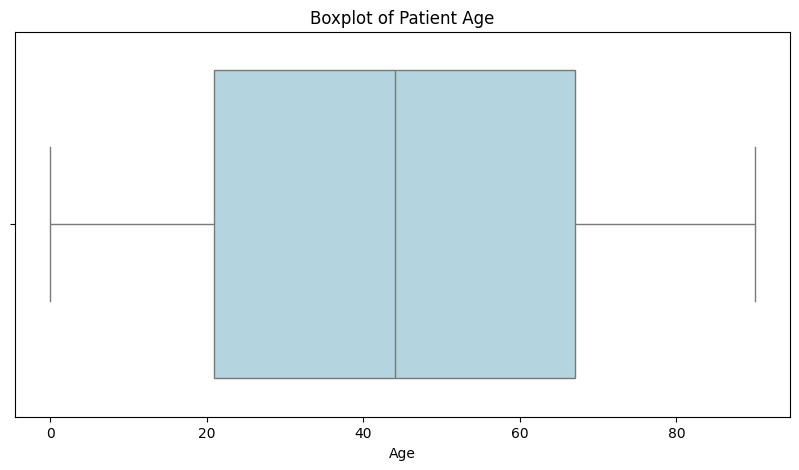

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['PatientAge'], color='lightblue')
plt.title('Boxplot of Patient Age')
plt.xlabel('Age')
plt.show()

#  * # DEMOGRAPHIC ANALYSIS  *

# 1. Calculate the average age of patients by gender.

In [27]:
grouped = df.groupby('PatientGender')['PatientAge'].mean().reset_index()
grouped

,PatientGender,PatientAge
0,Female,44.406188
1,Male,44.282804


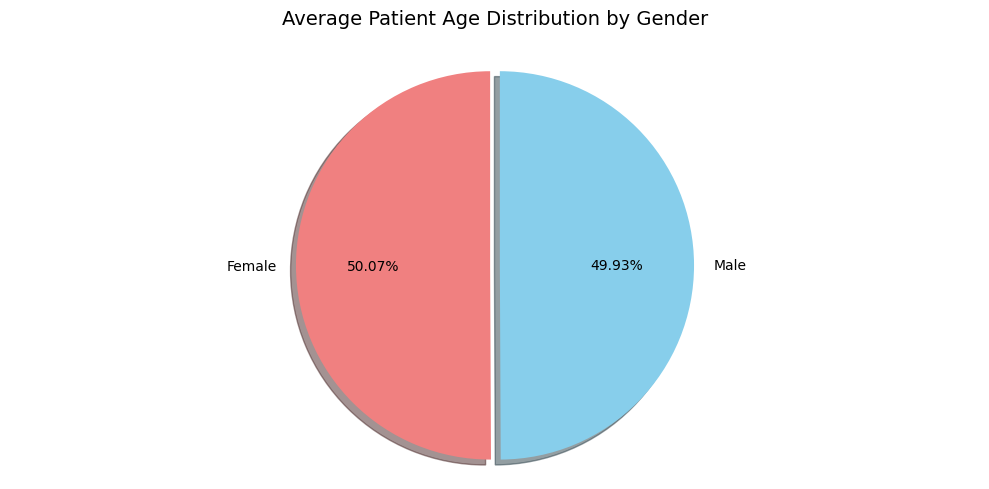

In [33]:
# Create the pie chart
plt.figure(figsize=(10, 5))  # Optional: Set figure size
plt.pie(
    grouped['PatientAge'],
    labels=grouped['PatientGender'],
    autopct='%1.2f%%',  # Show percentages with 1 decimal
    startangle=90,       # Rotate pie to start at the top
    colors=['lightcoral', 'skyblue'],  # Custom colors
    shadow=True,         # Add shadow effect
    explode=(0.05, 0)    # "Explode" slices slightly
)

# Add title and formatting
plt.title('Average Patient Age Distribution by Gender', fontsize=14, pad=20)
plt.axis('equal')  # Ensure pie is drawn as a circle

# Show the plot
plt.tight_layout()
plt.show()

# 2. Find the distribution of patients across different states (count per state).

In [35]:
# Get patient count per state (sorted)
state_distribution = df['State'].value_counts().sort_values(ascending=False).reset_index()
state_distribution


,State,count
0,TX,946
1,MT,776
2,MA,592
3,IL,554
4,WV,488
5,PA,411
6,AL,354
7,MS,236
8,NY,232
9,OK,186


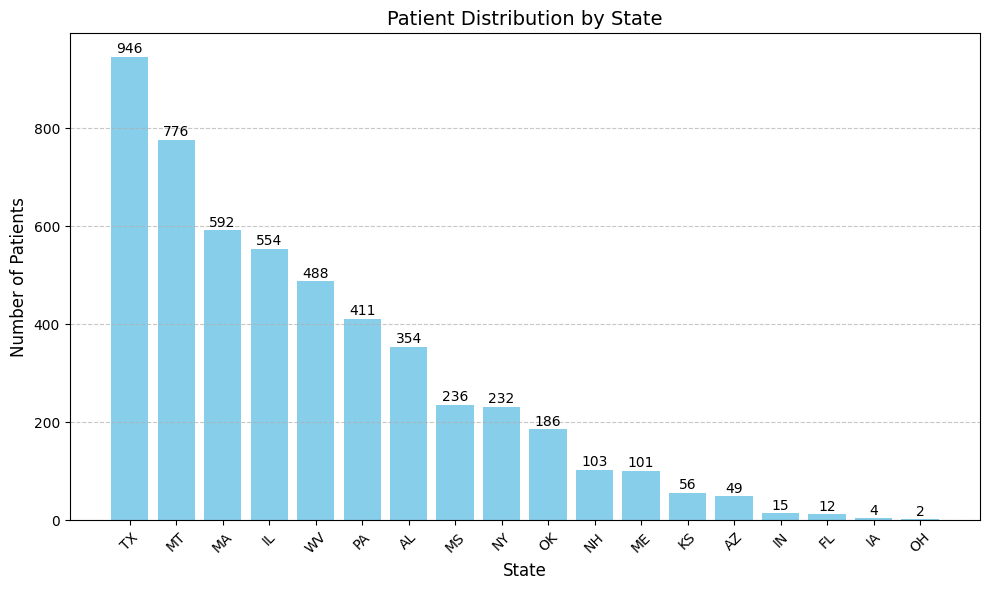

In [37]:
state_distribution = df['State'].value_counts().sort_values(ascending=False)
# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(state_distribution.index, state_distribution.values, color='skyblue')

# Add patient count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-position (center of bar)
        height + 1,                         # y-position (slightly above bar)
        f'{int(height)}',                    # text (patient count)
        ha='center',                         # horizontal alignment
        va='bottom',                         # vertical alignment
        fontsize=10
    )

#  Customize the plot
plt.title('Patient Distribution by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.xticks(rotation=45)  # Rotate state labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Show the plot
plt.tight_layout()  # Prevent label cutoff
plt.show()

# 3. Identify the top 5 cities with the most patients

In [60]:
top_cities_df = df['City'].value_counts().head(5).reset_index()
top_cities_df.columns = ['City', 'Patient Count']
top_cities_df

,City,Patient Count
0,Emerson,749
1,Longview,588
2,Storms,563
3,Willow Run,554
4,West Point,411


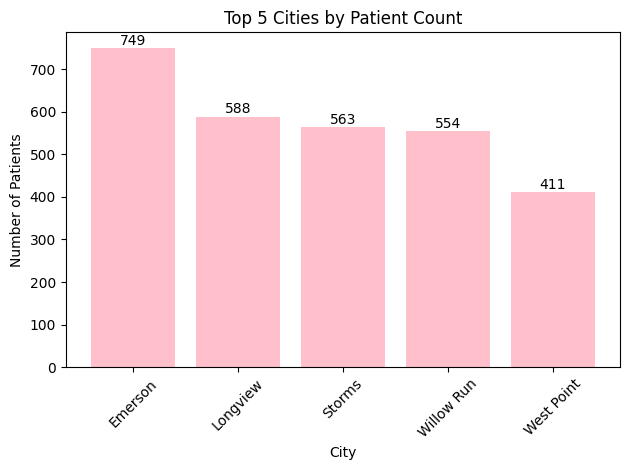

In [65]:
import matplotlib.pyplot as plt

bars= plt.bar(top_cities_df['City'],top_cities_df['Patient Count'], color='pink')

# Add patient count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-position (center of bar)
        height + 1,                         # y-position (slightly above bar)
        f'{int(height)}',                    # text (patient count)
        ha='center',                         # horizontal alignment
        va='bottom',                         # vertical alignment
        fontsize=10
    )
    
plt.title('Top 5 Cities by Patient Count')
plt.xlabel('City')
plt.ylabel('Number of Patients')



plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# * AGE GROUP ANALYSIS *

# 1. Categorize patients into age groups (e.g., 0-18, 19-35, 36-50, 51-65, 65+) and count the number of patients in each group.

In [18]:
import numpy as np

conditions = [ 
    (df['PatientAge'] <= 18),
    (df['PatientAge'] > 18) & (df['PatientAge'] <= 35),
    (df['PatientAge'] > 35) & (df['PatientAge'] <= 50),
    (df['PatientAge'] > 50) & (df['PatientAge'] <= 65),
    (df['PatientAge'] > 65)
]

choices = ['Young', 'Adult', 'Getting Old', 'Old', 'Oldest']

df['Age Criteria'] = np.select(conditions, choices, default='Unknown')
df['Age Criteria'].reset_index()

Criteria_wise_patients= df['Age Criteria'].value_counts().sort_values(ascending=False).reset_index()
Criteria_wise_patients.columns = ['Age Criteria', 'No of Patients']
Criteria_wise_patients


,Age Criteria,No of Patients
0,Oldest,1361
1,Young,1100
2,Adult,957
3,Getting Old,854
4,Old,845


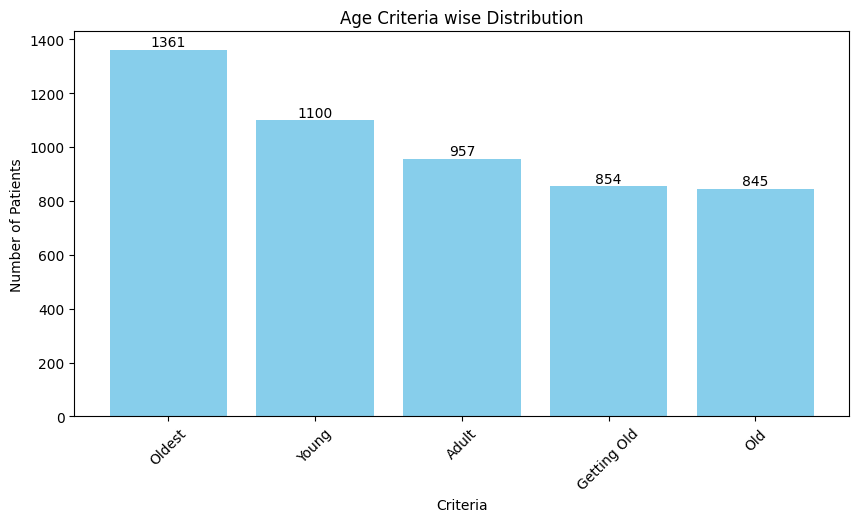

In [23]:
plt.figure(figsize=(10,5))
bars = plt.bar(Criteria_wise_patients['Age Criteria'],Criteria_wise_patients['No of Patients'], color= 'skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-position (center of bar)
        height + 1,                         # y-position (slightly above bar)
        f'{int(height)}',                    # text (patient count)
        ha='center',                         # horizontal alignment
        va='bottom',                         # vertical alignment
        fontsize=10
    )
    
plt.title('Age Criteria wise Distribution')
plt.xlabel('Criteria')
plt.ylabel('Number of Patients')



plt.xticks(rotation=45)

plt.show()


# 2. Compare the gender distribution within each age group.

In [33]:
Gender_Distribution = df[['Age Criteria','PatientGender']].value_counts().reset_index()
Gender_Distribution.columns = ['Age Criteria','PatientGender', 'CountGender']
Gender_Distribution

,Age Criteria,PatientGender,CountGender
0,Oldest,Female,803
1,Young,Female,640
2,Adult,Female,573
3,Oldest,Male,558
4,Getting Old,Female,508
5,Old,Female,482
6,Young,Male,460
7,Adult,Male,384
8,Old,Male,363
9,Getting Old,Male,346


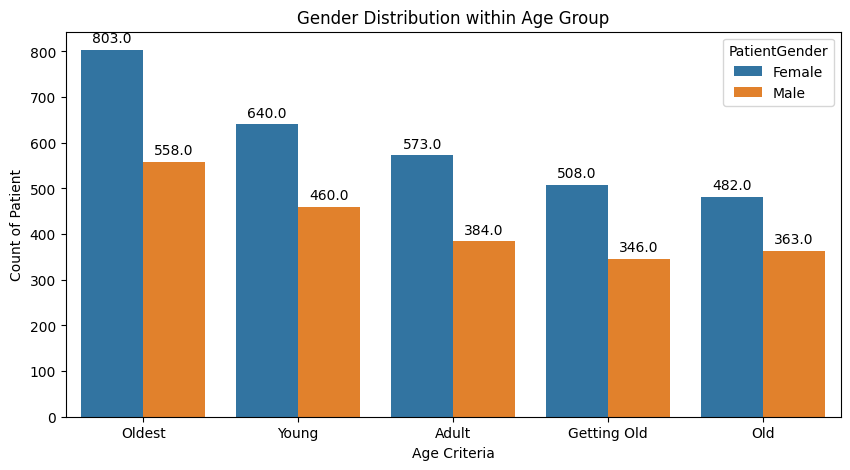

In [41]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data= Gender_Distribution, x='Age Criteria', y='CountGender', hue='PatientGender')

# Add value labels (aggregated means here)
for container in ax.containers:
    labels = [f'{v.get_height():.1f}' for v in container]
    ax.bar_label(container, labels=labels, padding=3)


plt.xlabel('Age Criteria')
plt.ylabel('Count of Patient')

plt.title("Gender Distribution within Age Group")

plt.show()

# * EMAIL DOMAIN ANALYSIS *

# 1. Extract the domain from the email addresses (e.g., datacourse.com) and count how many patients use each domain.

In [43]:
df['EmailDomain'] = df['Email'].str.split('@').str[1]

# Count domains
domain_counts = df['EmailDomain'].value_counts().reset_index()
domain_counts.columns = ['Domain', 'PatientCount']
domain_counts

,Domain,PatientCount
0,datacourse.com,5117


# 2. Are there any invalid or unusual email domains?

In [45]:
# 1. Extract domains
df['Domain'] = df['Email'].str.extract(r'@([\w.-]+)')

# 2. Identify invalid emails (no @ or invalid format)
invalid_emails = df[df['Email'].str.contains(r'^[^@]+@[^@]+\.[^@]+$') == False]
print(f"Found {len(invalid_emails)} invalid email formats:")
print(invalid_emails[['PatientID', 'Email']])

# 3. Find unusual domains (appearing less than 5 times)
domain_counts = df['Domain'].value_counts()
unusual_domains = domain_counts[domain_counts < 5].index.tolist()

unusual_records = df[df['Domain'].isin(unusual_domains)]
print(f"\nFound {len(unusual_records)} records with unusual domains:")
print(unusual_records[['PatientID', 'Email', 'Domain']])

Found 0 invalid email formats:
Empty DataFrame
Columns: [PatientID, Email]
Index: []

Found 0 records with unusual domains:
Empty DataFrame
Columns: [PatientID, Email, Domain]
Index: []


# * STATE AND CITY ANALYSIS *


# 1. Which state has the highest number of patients?

In [55]:
x = df['State'].value_counts().reset_index().head(5)
x.columns = ['State','PatientCount']
x

,State,PatientCount
0,TX,945
1,MT,776
2,MA,592
3,IL,554
4,WV,488


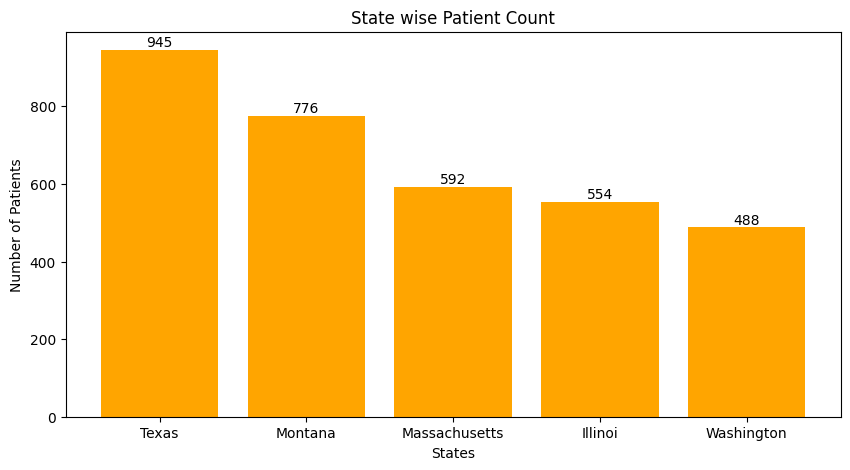

In [59]:
conditions = [ 
    (x['State'] == 'TX'),
    (x['State'] == 'MT'),
    (x['State'] == 'MA'),
    (x['State'] =='IL'),
    (x['State'] == 'WV')
]

choices = ['Texas', 'Montana', 'Massachusetts', 'Illinoi', 'Washington']

x['State'] = np.select(conditions, choices, default='Unknown')
x['State'].reset_index()

plt.figure(figsize=(10,5))
bars = plt.bar(x['State'],x['PatientCount'],color='orange')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-position (center of bar)
        height + 1,                         # y-position (slightly above bar)
        f'{int(height)}',                    # text (patient count)
        ha='center',                         # horizontal alignment
        va='bottom',                         # vertical alignment
        fontsize=10
    )
    
plt.title('State wise Patient Count')
plt.xlabel('States')
plt.ylabel('Number of Patients')

plt.show()

# 2. For the state with the most patients, what is the most common city?

In [75]:
# From above example we have know that 'TX' is the state has most no of patient so we are not taking any other
# state into consideration that 'TX'.

TexasCity_PatientCount = df[df['State'] == 'TX']['City'].value_counts().reset_index()
TexasCity_PatientCount

,City,count
0,Storms,562
1,Mittenlane,249
2,Martins Corner,134


# * DUPLICATE OR UNIQUE PATIENT ANALYSIS *


# 1. Check if there are any duplicate PatientID or PatientNumber entries.

In [82]:
duplicateID = df['PatientID'].duplicated().sum()
print(f"Number of duplicate IDs are {duplicateID}")

Number of duplicate IDs are 0


In [86]:
duplicateNumbers = df['PatientNumber'].duplicated().sum()
duplicateNumbers
print(f"Number of duplicate Numbers are {duplicateNumbers}")


Number of duplicate Numbers are 155


# 2.  Are there patients with the same first and last name? If so, how many?

In [9]:
# Group by first and last name and count occurrences
# groupby + size() is used to count how many patients have the same first_name and last_name
name_counts = df.groupby(['FirstName', 'LastName']).size().reset_index(name='count')

# Filter where count > 1 to get duplicates
duplicate_names = name_counts[name_counts['count'] > 1]

# Number of duplicate name combinations
duplicate_name_count = len(duplicate_names)

print(duplicate_name_count)

151


# * AGE & GENDER CORRELATION ANALYSIS *

# 1. Is there a correlation between age and gender in this dataset?(e.g., are females generally older than males?)

  PatientGender  Average Age  Count
0        Female    44.406188   3006
1          Male    44.282804   2111
By above statistics we can say that No of Female patients are higher than Male. Also Females are slightly older than Male.


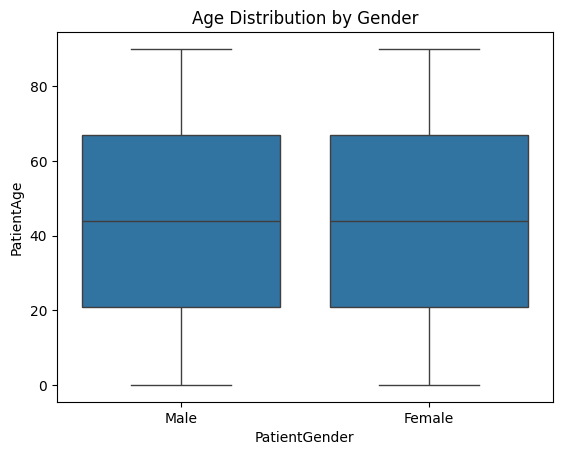

In [36]:
average_age_by_gender = df.groupby('PatientGender')['PatientAge'].agg(['mean', 'count']).reset_index()
average_age_by_gender.columns = ['PatientGender','Average Age','Count']
print(average_age_by_gender)
print(f"By above statistics we can say that No of Female patients are higher than Male. Also Females are slightly older than Male.")


sns.boxplot(data= df,x='PatientGender', y='PatientAge')
plt.title("Age Distribution by Gender")
plt.show()

# 2. How many patients are under 18 years old?

In [46]:
under_18 = df[df['PatientAge'] < 18]
under_18
num_under_18 = len(under_18)
print(f"Number of patients under 18: {num_under_18}")

Number of patients under 18: 1049


# 3. How many patients are above 65 years old?

In [47]:
age_above = df[df['PatientAge']>65]
age_above
new_age_above = len(age_above)
print(f"Number of patients above 65: {new_age_above}")

Number of patients above 65: 1361


# * NAME ANALYSIS *

# 1. What are the top 5 most common first names?

In [51]:
common_firstname= df['FirstName'].value_counts().reset_index().head(5)
common_firstname.columns = ['FirstName', 'Count']
common_firstname

,FirstName,Count
0,Joanne,48
1,Gabrielle,46
2,Nicola,45
3,Megan,44
4,Lisa,43


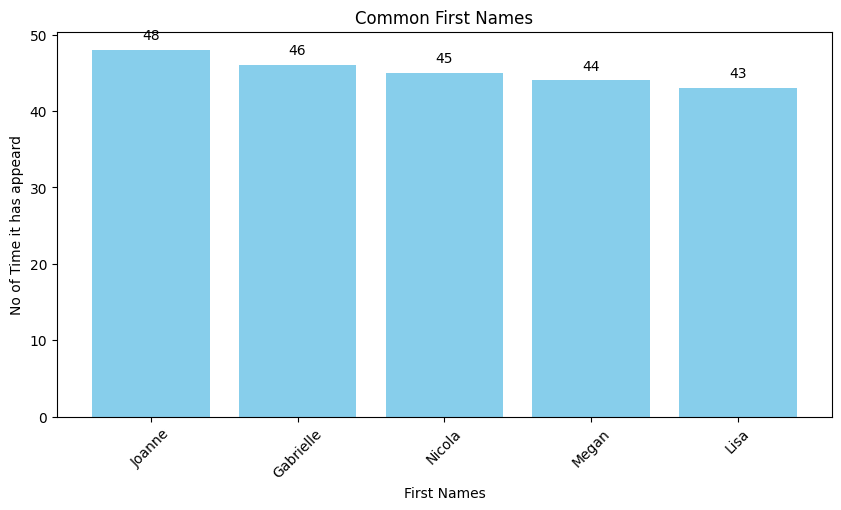

In [62]:
plt.figure(figsize=(10,5))
bars= plt.bar(common_firstname['FirstName'], common_firstname['Count'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-position (center of bar)
        height + 1,                         # y-position (slightly above bar)
        f'{int(height)}',                    # text (patient count)
        ha='center',                         # horizontal alignment
        va='bottom',                         # vertical alignment
        fontsize=10
    )
    
plt.title('Common First Names')
plt.xlabel('First Names')
plt.ylabel('No of Time it has appeard')
plt.xticks(rotation= 45)

plt.show()

# 2. What are the top 5 most common last names?

In [66]:
common_last_names = df['LastName'].value_counts().reset_index().head(5)
common_last_names.columns = ['LastName','Count']
common_last_names

,LastName,Count
0,Smith,51
1,Ince,48
2,Vance,47
3,Metcalfe,44
4,Clark,44


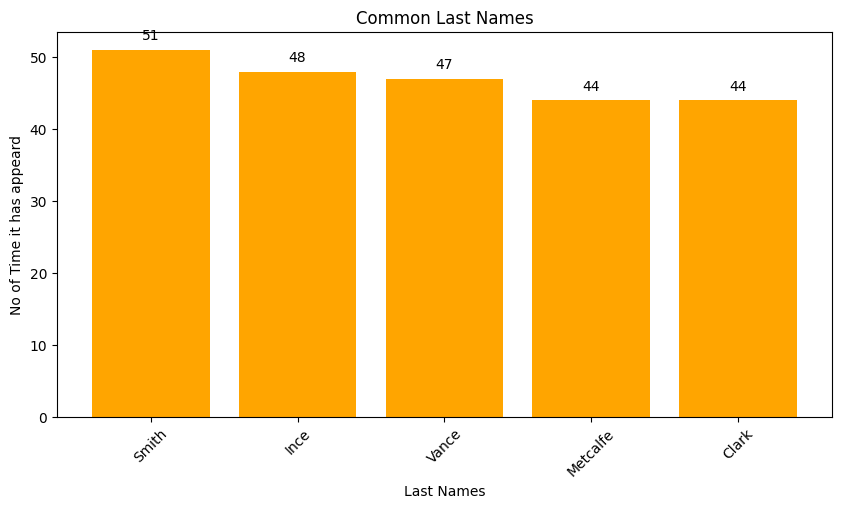

In [68]:
plt.figure(figsize=(10,5))
bars= plt.bar(common_last_names['LastName'], common_last_names['Count'], color='orange')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-position (center of bar)
        height + 1,                         # y-position (slightly above bar)
        f'{int(height)}',                    # text (patient count)
        ha='center',                         # horizontal alignment
        va='bottom',                         # vertical alignment
        fontsize=10
    )
    
plt.title('Common Last Names')
plt.xlabel('Last Names')
plt.ylabel('No of Time it has appeard')
plt.xticks(rotation= 45)

plt.show()